# Logistic Regression Project (Predict Ad click)

In this notebook we will use `Logistic Regression` to indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': customer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

## Get the Data

In [160]:
df = pd.read_csv('data/advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# 1. Exploratory Data Analysis

In [162]:
df['Clicked on Ad'].value_counts(normalize= True)

0    0.5
1    0.5
Name: Clicked on Ad, dtype: float64

C:\Users\misla\AppData\Local\Temp\ipykernel_20328\2396016717.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True);


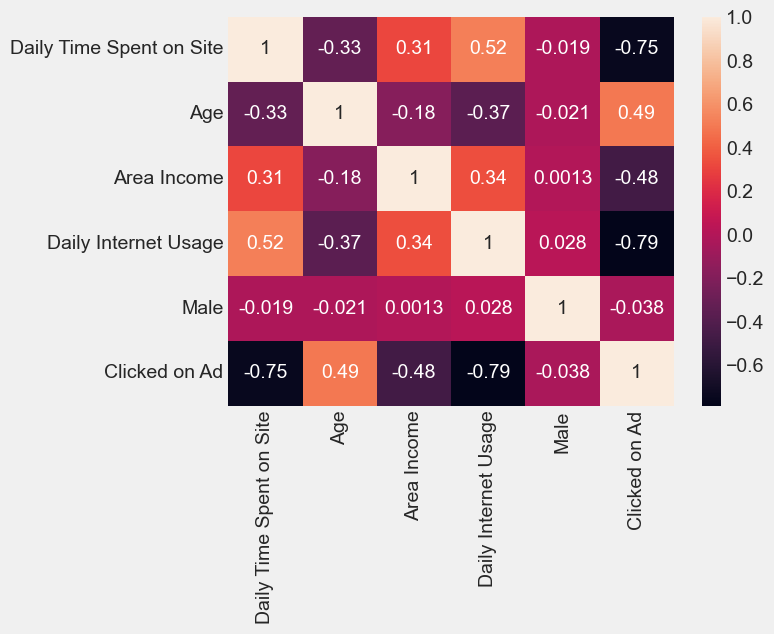

In [165]:
sns.heatmap(df.corr(), annot= True);

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


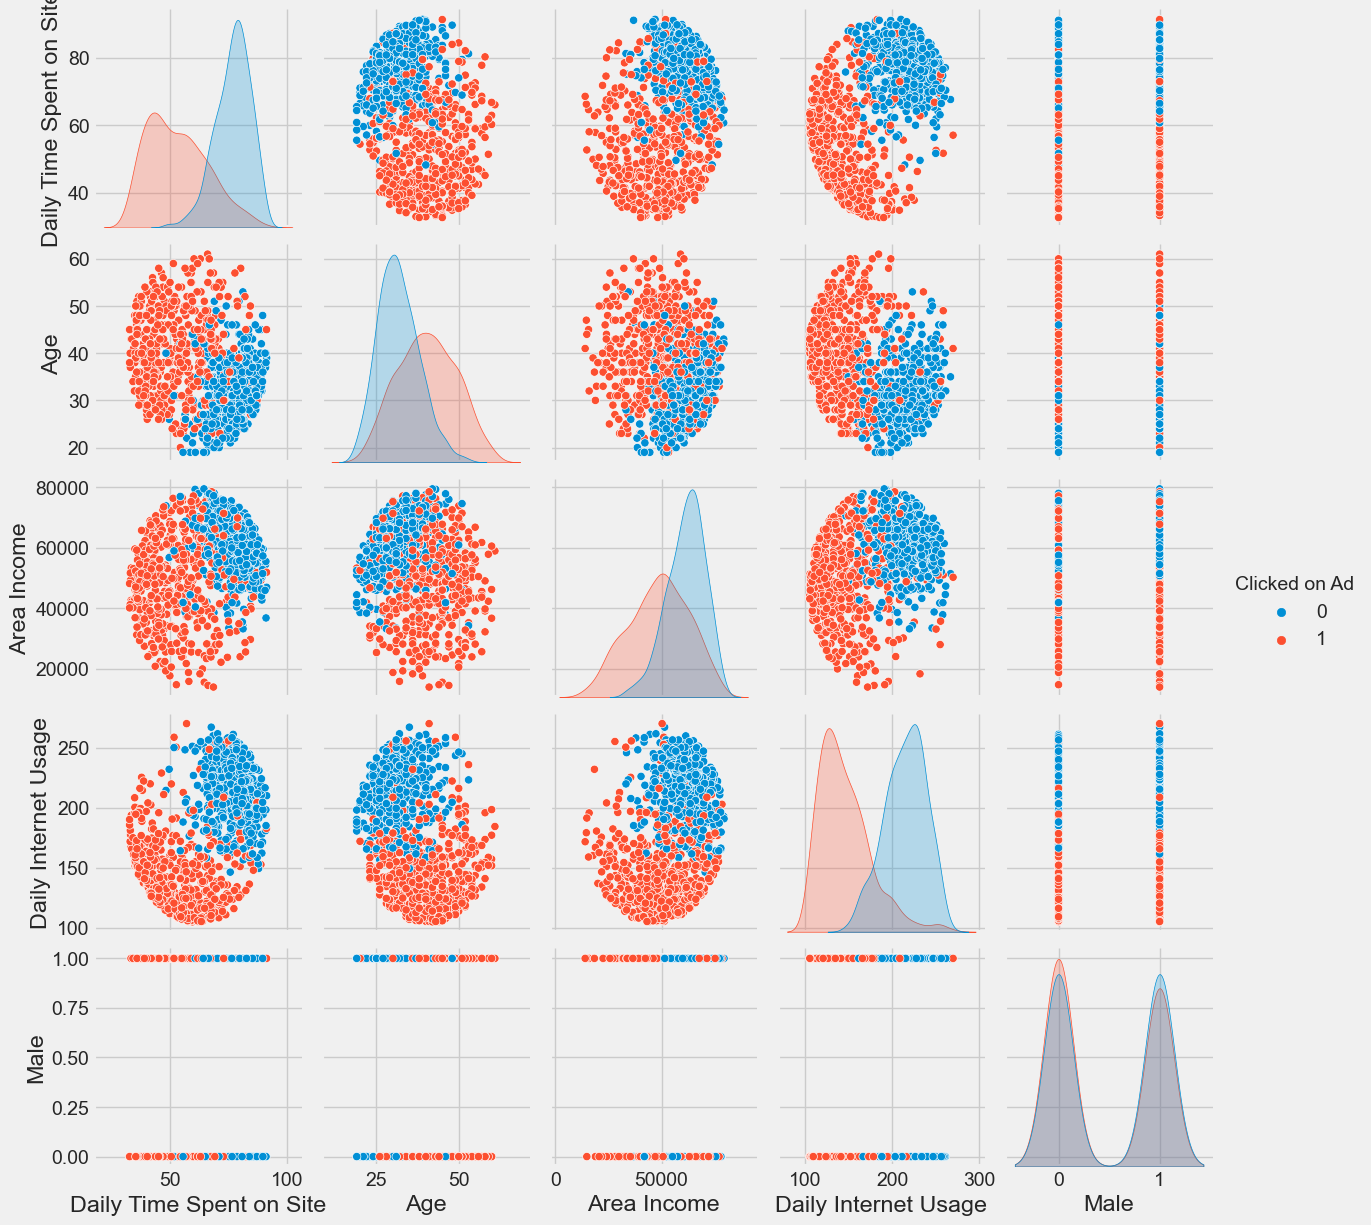

In [166]:
sns.pairplot(df, hue= 'Clicked on Ad');

# 2. Prepare Data for Logistic Regression



#### 1. Feature engineering


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [170]:
pd.get_dummies(df['Country'])

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica (the territory South of 60 deg S),Antigua and Barbuda,Argentina,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
from sklearn.preprocessing import LabelEncoder

In [174]:
df['Country'].nunique()

237

In [175]:
df['City'].nunique()

969

In [172]:
le = LabelEncoder()
le.fit_transform(df['Country'])

array([215, 147, 184, 103,  96, 158, 145,  12,  82,  78, 171,  34,  60,
        26,  18, 197, 161,   0,  29, 174,  36,  36,  34, 111, 212, 139,
       219,  80,  30,  27, 165,  11, 128, 187,  57, 122, 141, 221, 177,
       118, 174, 215, 217, 177, 154, 217, 171, 198, 214, 103,  30, 223,
        88, 137, 216,  51, 102, 201,  14,  99,  34, 182,  34,  32,  44,
        37, 175, 218, 215, 156,  27, 218,  48, 216,  85,  50,  67, 171,
       100, 221, 138, 153, 142, 210,  27, 170,  40, 230,  12, 232, 106,
       170, 183,  80,   7,   1,  94, 121,  60,  17, 233, 188, 128,  54,
        86, 208,  24,  44,  87, 137, 125, 116,  63,  89, 214, 106, 222,
       132, 194,  24,  80,  22, 163, 228, 195,  60,  95,  66,  57, 106,
       121, 180,  52, 224,  21,  21,   7, 182, 112, 209,  79,  92, 111,
       177, 218,  54, 149,  19,  57, 195, 152, 211, 109, 160, 210,  35,
        21,  52,  49, 120, 111, 221,   5, 147,  62, 140, 201, 210,  28,
        41, 169, 126, 171, 191,  87, 108, 112, 175,  43,  27, 23


#### 2. Train test split


In [178]:
X = df.iloc[::, :4]
Y = df['Clicked on Ad']

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [181]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.20, random_state=42)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('Y_train shape: ', Y_train.shape)
print('Y_test shape: ', Y_test.shape)

X_train shape:  (800, 4)
X_test shape:  (200, 4)
Y_train shape:  (800,)
Y_test shape:  (200,)



#### 3. StandardScaler()


In [182]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

# 3. Implement a Logistic Regression in Scikit-Learn and predict. Use cross validation.

In [183]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scal, Y_train)

LogisticRegression()

In [187]:
log_reg.score(X_test_scal, Y_test)

0.95

In [193]:
np.mean(cross_val_score(log_reg, X_test_scal, Y_test, cv= 10, scoring= 'accuracy'))

0.9549999999999998

In [ ]:
# LogisticRegressionCV()

# 4. Evaluation


In [197]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, \
    roc_curve, precision_recall_curve, accuracy_score, confusion_matrix


#### 1. Confusion Matrix


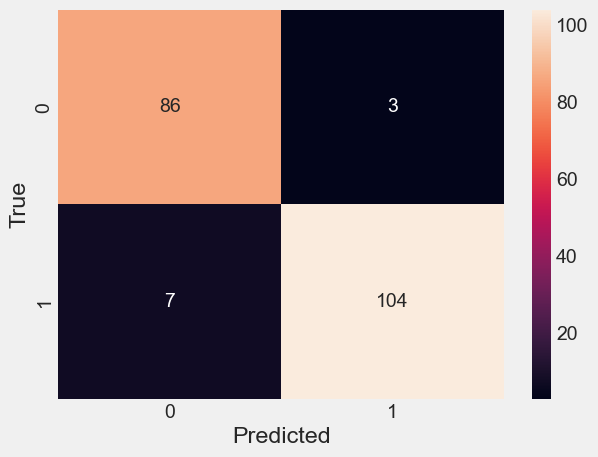

In [204]:
sns.heatmap(confusion_matrix(Y_test, log_reg.predict(X_test_scal)), annot= True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('True');



#### 2. Precision


TP/(TP+FP)

In [205]:
precision_score(Y_test, log_reg.predict(X_test_scal))

0.9719626168224299



#### 3. Recall


TP/(TP+FN)

In [206]:
recall_score(Y_test, log_reg.predict(X_test_scal))

0.9369369369369369



#### 4. F1 Score


2 * precision * recall / (precision + recall)

In [207]:
f1_score(Y_test, log_reg.predict(X_test_scal))

0.9541284403669725



#### 5. ROC curve

In [214]:
log_reg.predict_proba(X_test_scal)[:, 1]

array([0.98833121, 0.99963025, 0.99914922, 0.99515132, 0.00842319,
       0.40596946, 0.02900217, 0.9998407 , 0.01314573, 0.99993923,
       0.00661748, 0.9992326 , 0.99991975, 0.00954372, 0.99964742,
       0.99996029, 0.99998974, 0.99704468, 0.03079672, 0.99987411,
       0.00653336, 0.98636169, 0.99997624, 0.15998662, 0.00605424,
       0.99998634, 0.03732577, 0.00473124, 0.99990794, 0.99890308,
       0.10640896, 0.57292438, 0.01207587, 0.97757948, 0.99993845,
       0.01731963, 0.00904979, 0.70958049, 0.99956986, 0.99998011,
       0.01455442, 0.99995106, 0.49958004, 0.99996518, 0.01575896,
       0.0954925 , 0.98455576, 0.99998256, 0.19094335, 0.99980231,
       0.99998127, 0.02778573, 0.9983761 , 0.02732459, 0.00904399,
       0.01638689, 0.01085469, 0.99997816, 0.01344974, 0.9997708 ,
       0.00527967, 0.9981546 , 0.01886061, 0.99996811, 0.99733436,
       0.99952397, 0.99998318, 0.01609543, 0.99639274, 0.99981232,
       0.99815466, 0.99606132, 0.82565387, 0.03638522, 0.89513

In [210]:
fpr, tpr, thresholds = roc_curve(Y_test, log_reg.predict_proba(X_test_scal)[:, 1])

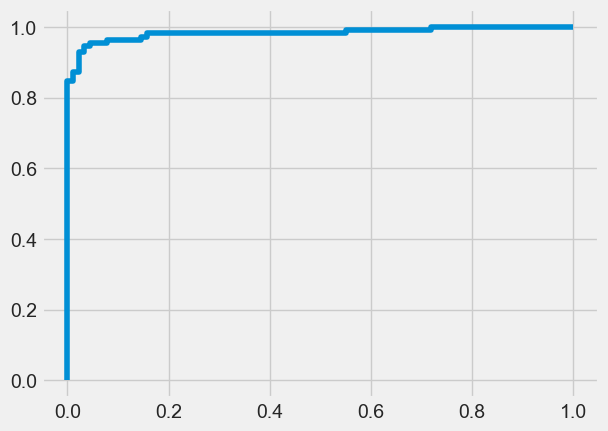

In [212]:
plt.plot(fpr, tpr);

In [216]:
roc_auc_score(Y_test, log_reg.predict_proba(X_test_scal)[:, 1])

0.9825893309039376



#### 6. P-R curve

In [218]:
precision, recall, thresholds = precision_recall_curve(Y_test, log_reg.predict_proba(X_test_scal)[:, 1])

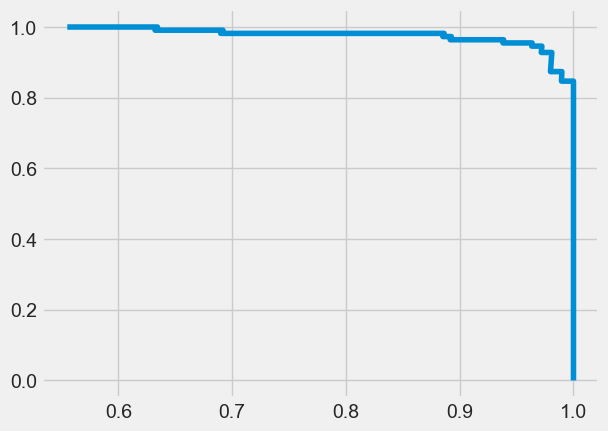

In [219]:
plt.plot(precision, recall);